## HW1
Во вкладке **Files** в группе **Webinars** прикреплен файл _olimpicmedals.csv с данными о
медалях на Олимпийских играх за 1896-2008 годы.
Скачайте .csv файл себе на диск, загрузите данные в DataFrame (функция _readcsv) и
ответьте на следующие вопросы, используя функционал pandas:

In [1]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('olimpic_medals.csv')

### 1. Сколько медалей выиграл Jesse Owens в 1936?

In [2]:
df.loc[((df.Athlete=='OWENS, Jesse') & (df.Edition==1936))].shape[0]

4

### 2. Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне?

In [3]:
df.loc[(df.Medal=='Gold') & (df.Gender=='Men') & (df.Sport=='Badminton')].groupby(["NOC"]).size().nlargest(1)


NOC
INA    8
dtype: int64

### 3. Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [4]:
df.loc[(df.Edition>=1984) & (df.Edition<=2008)].groupby('NOC').size().nlargest(3)


NOC
USA    1837
AUS     762
GER     691
dtype: int64

### 4. Покажите мужчин  - золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город, в котором проходила олимпиала, год, имя атлета и страну, за которую он выступал.

In [5]:
df.loc[(df.Gender=='Men') &
      (df.Medal=='Gold') &
      (df.Event=='100m'),
       ['City',
        'Edition', 
        'Athlete' ,
        'NOC'
   ]].sort_values(['Edition'],ascending=False)

City  Edition                Athlete  NOC
27552                Beijing     2008            BOLT, Usain  JAM
25539                 Athens     2004         GATLIN, Justin  USA
23521                 Sydney     2000        GREENE, Maurice  USA
21598                Atlanta     1996        BAILEY, Donovan  CAN
19859              Barcelona     1992      CHRISTIE, Linford  GBR
18284                  Seoul     1988            LEWIS, Carl  USA
16794            Los Angeles     1984            LEWIS, Carl  USA
15374                 Moscow     1980           WELLS, Allan  GBR
14069               Montreal     1976       CRAWFORD, Hasely  TRI
12902                 Munich     1972         BORZOV, Valery  URS
11865                 Mexico     1968       HINES, James Ray  USA
10823                  Tokyo     1964          HAYES, Robert  USA
9924                    Rome     1960            HARY, Armin  EUA
9009   Melbourne / Stockholm     1956  MORROW, Robert Joseph  USA
8121                Helsinki     1952        REMIGINO, Lindy  USA
7302                  London     1948      DILLARD, Harrison  USA
6427                  Berlin     1936           OWENS, Jesse  USA
5806             Los Angeles     1932           TOLAN, Eddie  USA
5095               Amsterdam     1928        WILLIAMS, Percy  CAN
4236                   Paris     1924       ABRAHAMS, Harold  GBR
2996                 Antwerp     1920       PADDOCK, Charles  USA
2022               Stockholm     1912           CRAIG, Ralph  USA
1191                  London     1908       WALKER, Reginald  RSA
737                 St Louis     1904           HAHN, Archie  USA
231                    Paris     1900        JARVIS, Francis  USA
13                    Athens     1896          BURKE, Thomas  USA

### 5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебрянных и бронзовых медалей было выйграно каждым полом?

In [6]:
df.groupby(['Gender','Medal'])['Medal'].count()

Gender  Medal 
Men     Bronze    7175
        Gold      7365
        Silver    7181
Women   Bronze    2514
        Gold      2485
        Silver    2496
Name: Medal, dtype: int64

### 6.Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.

<AxesSubplot:title={'center':'Число всех медалей, выигранных на каждой олимпиаде'}, xlabel='Олимпиада', ylabel='Медали'>

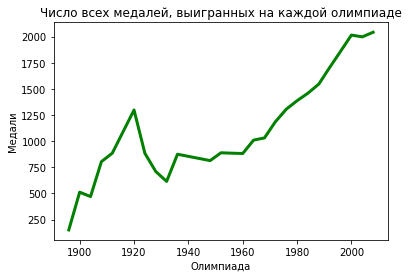

In [7]:
import matplotlib.pyplot as plt
plt.title('Число всех медалей, выигранных на каждой олимпиаде')

df.groupby('Edition').size().plot(kind='line', 
                                  linewidth = 3, 
                                  color='green', 
                                  xlabel='Олимпиада',
                                  ylabel='Медали')


### 7.Создайте список, показывающий число всех медалей, выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны необходимо показать год первой и последней заработанной медали.

In [8]:
df.groupby('NOC').agg({'Edition': ['count','min', 'max']})

Edition            
      count   min   max
NOC                    
AFG       1  2008  2008
AHO       1  1988  1988
ALG      14  1984  2008
ANZ      29  1908  1912
ARG     239  1924  2008
..      ...   ...   ...
VIE       2  2000  2008
YUG     435  1924  2000
ZAM       2  1984  1996
ZIM      23  1980  2008
ZZX      48  1896  1904

[138 rows x 3 columns]

### 8.Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m

In [9]:
df.loc[(df.City=='Beijing') & (df.Event.isin(['100m', '200m'])),'Athlete']

27551                 DIX, Walter
27552                 BOLT, Usain
27553           THOMPSON, Richard
27554          FRASER, Shelly-ann
27555            SIMPSON, Sherone
27556             STEWART, Kerron
27569                 DIX, Walter
27570                 BOLT, Usain
27571             CRAWFORD, Shawn
27572             STEWART, Kerron
27573    CAMPBELL-BROWN, Veronica
27574              FELIX, Allyson
Name: Athlete, dtype: object

### 9.Постройте график числа золотых медалей, выйгранных США мужчинами и женщинами в атлетике.

In [11]:
df1=df[(df.NOC=='USA') & (df.Medal=='Gold') & (df.Sport=='Athletics')].groupby(['Edition', 'Gender'])['Edition'].count().unstack()

df1=df1.fillna(0)
df1

Gender    Men  Women
Edition             
1896      9.0    0.0
1900     16.0    0.0
1904     27.0    0.0
1908     19.0    0.0
1912     23.0    0.0
1920     14.0    0.0
1924     18.0    0.0
1928     14.0    1.0
1932     17.0    8.0
1936     15.0    5.0
1948     17.0    1.0
1952     17.0    4.0
1956     21.0    1.0
1960     12.0    6.0
1964     18.0    2.0
1968     18.0    6.0
1972      9.0    0.0
1976     12.0    0.0
1984     15.0   13.0
1988     10.0    9.0
1992     17.0    8.0
1996     14.0   11.0
2000     10.0    5.0
2004     10.0    7.0
2008      7.0    6.0

<AxesSubplot:title={'center':'Число золотых медалей, выйгранных США, мужчинами и женщинами в атлетике'}, xlabel='Олимпиада', ylabel='Медали'>

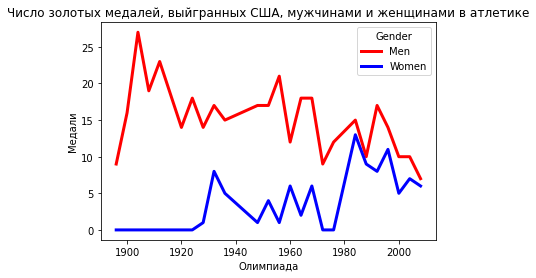

In [20]:
df1.plot(kind='line', 
         title="Число золотых медалей, выйгранных США, мужчинами и женщинами в атлетике",
          linewidth = 3, 
          color=[ 'red','blue'], 
          xlabel='Олимпиада',
          ylabel='Медали')

### 10.Постройте график 5 атлетов которые выйграли большинство золотых медалей.

<AxesSubplot:title={'center':'5 атлетов, которые выйграли большинство золотых медалей'}, xlabel='Атлеты', ylabel='Золоте медали'>

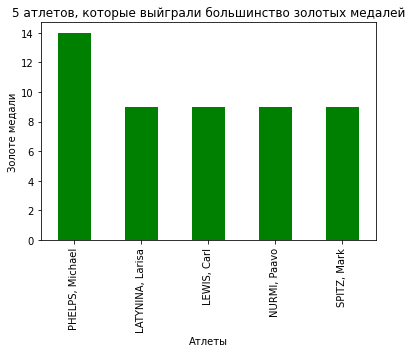

In [13]:
plt.title('5 атлетов, которые выйграли большинство золотых медалей')
df.loc[df.Medal=='Gold'].groupby('Athlete').size().nlargest(5).plot(kind='bar', 
                                  linewidth = 3, 
                                  color='green', 
                                  xlabel='Атлеты',
                                  ylabel='Золоте медали')

In [14]:
df.loc[(df.Medal=='Gold')].groupby('Athlete').size().nlargest(5)

Athlete
PHELPS, Michael     14
LATYNINA, Larisa     9
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
dtype: int64

### 11.Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх.

In [15]:
df.groupby('Edition').size().nlargest(1)

Edition
2008    2042
dtype: int64

### 12.Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета

In [16]:
df[(df.NOC=='USA')].groupby(['Edition','Athlete','Discipline']).size().reset_index(name='count').sort_values(by=['Edition', 'count'], ascending=False).drop_duplicates(subset='Edition')

Edition                      Athlete     Discipline  count
3478     2008              PHELPS, Michael       Swimming      8
3241     2004              PHELPS, Michael       Swimming      8
3060     2000                 TORRES, Dara       Swimming      5
2718     1996               HALL, Gary Jr.       Swimming      4
2582     1992              MILLER, Shannon    Artistic G.      5
2309     1988              BIONDI, Matthew       Swimming      7
2222     1984             RETTON, Mary-Lou    Artistic G.      5
1885     1976    BABASHOFF, Shirley Farber       Swimming      5
1859     1972                  SPITZ, Mark       Swimming      7
1686     1968            HENNE, Jane Margo       Swimming      4
1563     1964              ELLIS, Kathleen       Swimming      4
1515     1960  VON SALTZA, Susan Christina       Swimming      4
1325     1956          BAKER, Walter Thane      Athletics      3
1249     1952          KONNO, Ford Hiroshi       Swimming      3
1099     1948        CURTIS, Ann Elisabeth       Swimming      3
1040     1936                 OWENS, Jesse      Athletics      4
871      1932           DIDRIKSON, Mildred      Athletics      3
759      1928       BARBUTI, Raymond James      Athletics      2
617      1924             EDERLE, Gertrude       Swimming      3
514      1920                  LEE, Willis       Shooting      7
428      1912        OSBURN, Carl Townsend       Shooting      4
369      1908             SHEPPARD, Melvin      Athletics      3
101      1904              DOWNING, Burton  Cycling Track      6
14       1900               BAXTER, Irving      Athletics      5
5        1896              GARRETT, Robert      Athletics      4